In [1]:
%run dataset.py
%matplotlib inline

from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
import numpy as np
from PIL import ImageStat
import matplotlib.pyplot as plt
import random

In [2]:
'''
dataset = CXRDataset('dataset', dataset_type='train')

mean = np.zeros(3)
for i in range(len(dataset)):
    image = dataset[i][0]
    stat = ImageStat.Stat(image)
    mean += np.array(stat.mean)
    print('\r{:.2f}%'.format(100*i/len(dataset)), end='\r')
mean /= len(dataset)*255
print(mean) # 0.50576189
'''
print(0.50576189)

0.50576189


In [3]:
def show_tensor_image(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.50576189, 0.50576189, 0.50576189])
    inp = inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

In [4]:
trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.50576189, 0.50576189, 0.50576189], [1., 1., 1.])
])
dataset = CXRDataset('dataset', dataset_type='train', transform=trans)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True, num_workers=4)
images, labels, names, bboxes, bbox_valids = next(iter(dataloader))
label_string = []
for label in labels:
    t = ''
    for i, d in enumerate(label):
        if d == 1: t += dataset.classes[i]+'|'
    if t == '': t = 'no finding'
    else: t = t[:-1]
    label_string.append(t)

name: 00000631_008.png


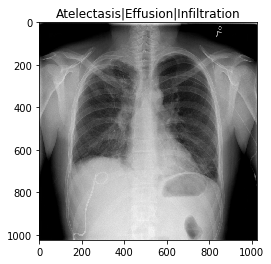

In [5]:
show_tensor_image(images[0], title=label_string[0])
print('name: '+names[0])

name: 00002198_000.png


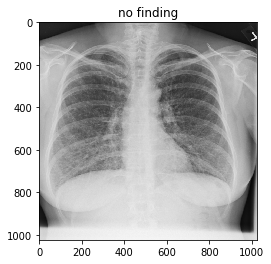

In [6]:
show_tensor_image(images[1], title=label_string[1])
print('name: '+names[1])

In [7]:
print(images.shape)
print(labels.shape)

torch.Size([2, 1, 1024, 1024])
torch.Size([2, 8])


In [8]:
print(images)
print(labels)
print(names)

tensor([[[[ 0.3844,  0.3766,  0.3844,  ...,  0.4119,  0.4589,  0.1217],
          [ 0.3687,  0.3570,  0.3648,  ...,  0.3884,  0.4354,  0.1217],
          [ 0.3413,  0.3452,  0.3531,  ...,  0.3687,  0.4197,  0.1099],
          ...,
          [-0.5018, -0.5018, -0.5018,  ..., -0.5058, -0.5058, -0.5058],
          [-0.5018, -0.5018, -0.5018,  ..., -0.5058, -0.5018, -0.5058],
          [-0.5018, -0.5018, -0.5018,  ..., -0.5058, -0.5018, -0.5058]]],


        [[[-0.3528, -0.3528, -0.3567,  ..., -0.3371, -0.3214, -0.2979],
          [-0.3371, -0.3371, -0.3371,  ..., -0.3254, -0.3175, -0.3018],
          [-0.3371, -0.3411, -0.3411,  ..., -0.3293, -0.3175, -0.3018],
          ...,
          [ 0.3648,  0.3609,  0.3648,  ...,  0.3805,  0.3805,  0.3844],
          [ 0.3609,  0.3609,  0.3609,  ...,  0.3805,  0.3844,  0.3805],
          [ 0.3648,  0.3648,  0.3609,  ...,  0.3805,  0.3805,  0.3805]]]])
tensor([[ 1,  0,  1,  1,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0]])
('00000631_008

In [9]:
datasets = {x: CXRDataset('dataset', dataset_type=x, transform=trans) for x in ['train', 'val', 'test']}
print(dataset.classes)
for x in ['train', 'val', 'test']:
    print('%s: %d'%(x, len(datasets[x])))

['Atelectasis' 'Cardiomegaly' 'Effusion' 'Infiltration' 'Mass' 'Nodule'
 'Pneumonia' 'Pneumothorax']
train: 7571
val: 1081
test: 2559


## BBox

In [10]:
trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.50576189, 0.50576189, 0.50576189], [1., 1., 1.])
])
dataset_bbox_only = CXRDataset_BBox_only('dataset', transform=trans)
dataloader_bbox_only = DataLoader(dataset_bbox_only, batch_size=1, shuffle=True, num_workers=4)
images, labels, names, bboxes, bbox_valids = next(iter(dataloader_bbox_only))
print(bboxes.shape)
print(bbox_valids.shape)

torch.Size([1, 8, 512, 512])
torch.Size([1, 8])


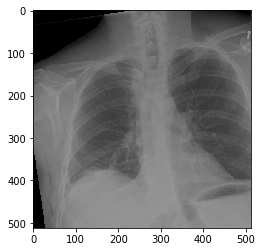

In [11]:
show_tensor_image(images[0])

bbox_valid :[ 0.  1.  1.  1.  1.  1.  1.  1.]
labels :[1 0 0 0 0 1 0 0]
00026769_010.png


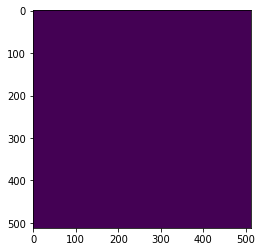

In [12]:
print('bbox_valid :'+str(bbox_valids[0].numpy()))
print('labels :'+str(labels[0].numpy()))
print(names[0])
plt.imshow(bboxes[0][0])

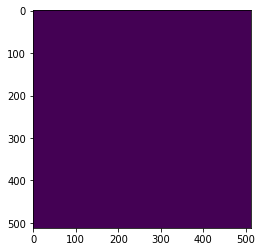

In [13]:
plt.imshow(bboxes[0][1])

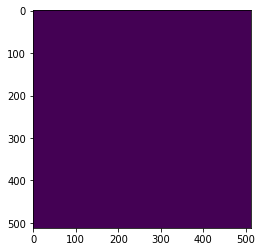

In [14]:
plt.imshow(bboxes[0][2])

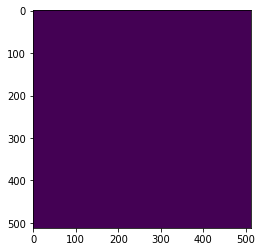

In [15]:
plt.imshow(bboxes[0][3])

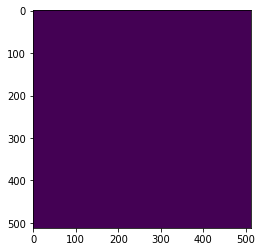

In [16]:
plt.imshow(bboxes[0][4])

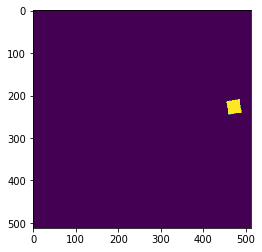

In [17]:
plt.imshow(bboxes[0][5])

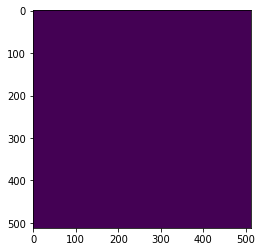

In [18]:
plt.imshow(bboxes[0][6])

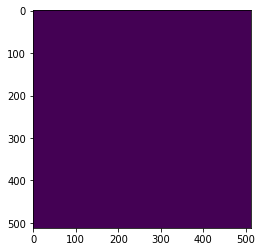

In [19]:
plt.imshow(bboxes[0][7])